In [37]:
from hossam import load_data
from pandas import melt, DataFrame
from matplotlib import pyplot as plt
from matplotlib import font_manager as fm
import seaborn as sb

from scipy.stats import shapiro, skew, kurtosis, normaltest, bartlett, levene

In [38]:
my_dpi=200
font_path='../NotoSansKR-Regular.ttf'
fm.fontManager.addfont(font_path)
font_prop=fm.FontProperties(fname=font_path)
font_name=font_prop.get_name()
plt.rcParams['font.family']=font_name
plt.rcParams['font.size']=6
plt.rcParams['axes.unicode_minus']=False

In [39]:
origin=load_data('two_store')
print(f'데이터셋 크기 : {origin.shape}')
print(f'행 개수 : {origin.shape[0]}개')
print(f'열 개수 : {origin.shape[1]}개')
print('데이터 타입 정보 :')
print(origin.info())
origin.head()

[data] https://data.hossam.kr/data/lab10/two_store.xlsx
[desc] 동일한 제품을 판매하고 있는 서로 다른 두 지역의 매장의 100일간의 일별 매출액을 기록한 가상의 데이터 (출처: 방송통신대학교 통계학개론)
[!] Cannot read metadata
데이터셋 크기 : (100, 2)
행 개수 : 100개
열 개수 : 2개
데이터 타입 정보 :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   store1  100 non-null    int64
 1   store2  100 non-null    int64
dtypes: int64(2)
memory usage: 1.7 KB
None


,store1,store2
0,34,63
1,63,85
2,57,75
3,50,48
4,37,58


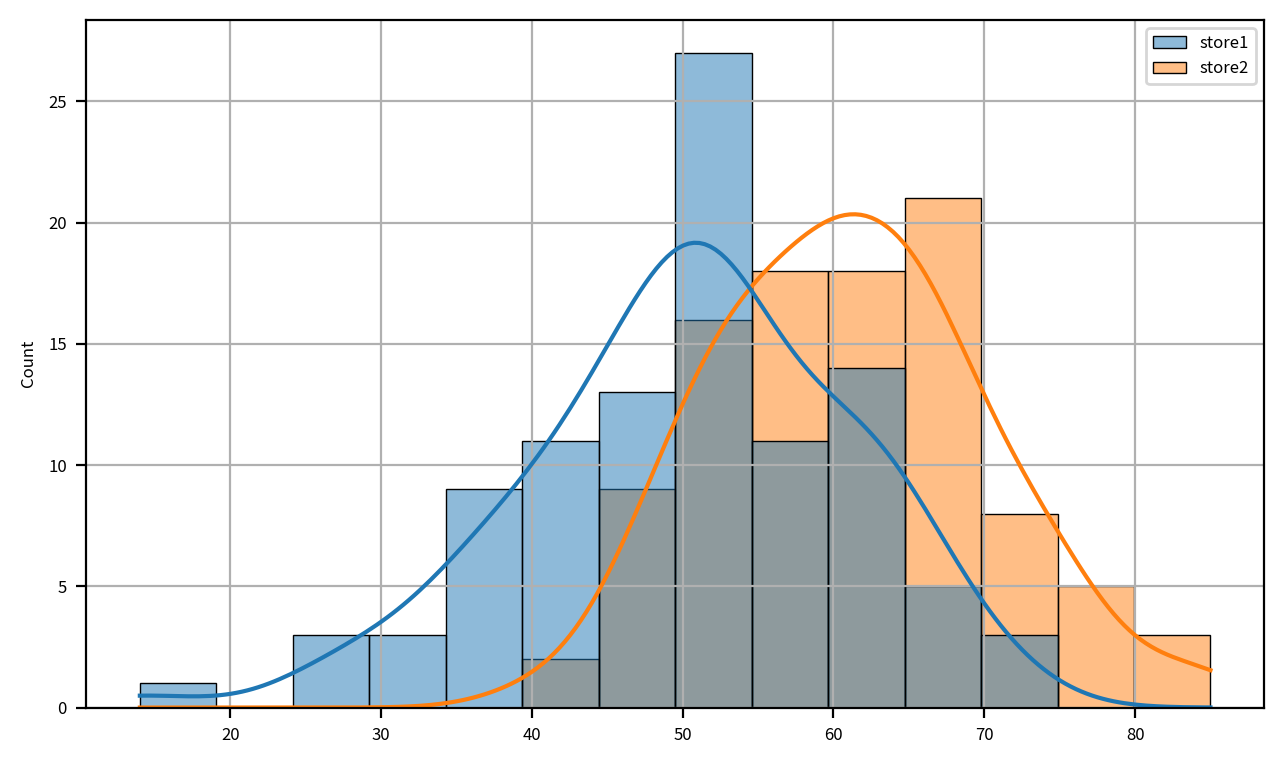

In [40]:
# 1. 그래프 초기화
width_px=1280
height_px=760
rows=1
cols=1
figsize=(width_px/my_dpi, height_px/my_dpi)
fig, ax=plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

# 2. 그래프 그리기
sb.histplot(data=origin, kde=True, edgecolor='#000000', linewidth=0.5)

# 3. 그래프 꾸미기
ax.grid(True)
# ax.set_title('⭐', color='#0066ff', fontsize=12, fontweight=1000, pad=10)
# ax.set_xlabel('⭐', color='#ff6600', fontsize=16, labelpad=10)
# ax.set_ylabel('⭐', color='#ff00ff', fontsize=16, labelpad=10)
# ax.set_xlim([⭐,⭐])      # x축 범위
# ax.set_ylim([⭐,⭐])   # y축 범위
# ax.set_xticks([1,2,3,4], ['1학년','2학년','3학년','4학년'])
# ax.set_yticks(range(70,101,3),range(70,101,3))

# 4. 출력
plt.tight_layout()
# plt.savefig('myplot.png',dpi=my_dpi)
plt.show()
plt.close()

In [41]:
s, p=shapiro(origin['store1'])
'statistic: {0:.3f}, p-value: {1:.3f}, 정규성 충족 여부: {2}'.format(s, p, p>0.05)

'statistic: 0.979, p-value: 0.109, 정규성 충족 여부: True'

In [42]:
s, p=shapiro(origin['store2'])
'statistic: {0:.3f}, p-value: {1:.3f}, 정규성 충족 여부: {2}'.format(s, p, p>0.05)

'statistic: 0.991, p-value: 0.731, 정규성 충족 여부: True'

In [43]:
s=skew(origin['store1'])
print('왜도: %0.3f'%s)
print('왜도의 절대값: %0.3f'%abs(s))

왜도: -0.506
왜도의 절대값: 0.506


In [44]:
k=kurtosis(origin['store1'])
print('첨도: %0.3f'%k)
print('첨도의 절대값: %0.3f'%abs(k))

첨도: 0.422
첨도의 절대값: 0.422


In [45]:
s=skew(origin['store2'])
k=kurtosis(origin['store2'])
print('왜도의 절대값: %0.3f, 첨도의 절대값: %0.3f'%(abs(s), abs(k)))

왜도의 절대값: 0.251, 첨도의 절대값: 0.178


In [46]:
s, p=normaltest(origin['store1'])
'statistic: {0:.3f}, p-value: {1:.3f}, 정규성 충족 여부: {2}'.format(s, p, p>0.05)

'statistic: 5.651, p-value: 0.059, 정규성 충족 여부: True'

In [47]:
s, p=normaltest(origin['store2'])
'statistic: {0:.3f}, p-value: {1:.3f}, 정규성 충족 여부: {2}'.format(s, p, p>0.05)

'statistic: 1.174, p-value: 0.556, 정규성 충족 여부: True'

In [48]:
fmt='[{0}] statistic: {1:.3f}, p-value: {2:.3f}, 정규성 충족 여부: {3}'

for c in origin.columns:
    s, p=normaltest(origin[c])
    print(fmt.format(c,s,p,p>=0.05))

[store1] statistic: 5.651, p-value: 0.059, 정규성 충족 여부: True
[store2] statistic: 1.174, p-value: 0.556, 정규성 충족 여부: True


In [49]:
s, p=bartlett(origin['store1'], origin['store2'])
print('Bartlett 검정 -> statistic: {0:.3f}, p-value: {1:.3f}, 등분산성 충족 여부: {2}'.format(s,p,p>0.05))

Bartlett 검정 -> statistic: 3.143, p-value: 0.076, 등분산성 충족 여부: True


In [50]:
s, p=levene(origin['store1'], origin['store2'])
print('Levene 검정 -> statistic: {0:.3f}, p-value: {1:.3f}, 등분산성 충족 여부: {2}'.format(s,p,p>0.05))

Levene 검정 -> statistic: 1.360, p-value: 0.245, 등분산성 충족 여부: True


In [51]:
normal_dist=True
data=origin.copy()
fields=list(map(lambda x: data[x], data.columns))

if normal_dist:
    n='Bartlett'
    s, p=bartlett(*fields)
else:
    n='Levene'
    s, p=levene(*fields)

print('{0} 검정 -> statistic: {1:.3f}, p-value: {2:.3f}, 정규성 충족 여부: {3}'.format(n,s,p,p>0.05))

Bartlett 검정 -> statistic: 3.143, p-value: 0.076, 정규성 충족 여부: True


In [52]:
data=melt(origin, var_name='store', value_name='value')
data

,store,value
0,store1,34
1,store1,63
2,store1,57
3,store1,50
4,store1,37
...,...,...
195,store2,69
196,store2,51
197,store2,65
198,store2,59


In [53]:
xname='store'
yname='value'

u1=data[xname].unique()
equal_var_fields=[]
normal_dist=True
report=[]

for i in u1:
    filtered_data=data[data[xname]==i][yname]
    equal_var_fields.append(filtered_data)
    s, p=normaltest(filtered_data)

    normalize=(p>0.05)
    report.append({
        'field':i,
        'statistic':s,
        'p-value':p,
        'result':normalize
    })
    normal_dist=normal_dist and normalize

if normal_dist:
    n='Bartlett'
    s, p=bartlett(*equal_var_fields)
else:
    n='Levene'
    s, p=levene(*equal_var_fields)

report.append({
    'field':n,
    'statistic':s,
    'p-value':p,
    'result':p>0.05
})

report_df=DataFrame(report).set_index('field')
report_df

,statistic,p-value,result
field,,,
store1,5.651229,0.059272,True
store2,1.173772,0.556056,True
Bartlett,3.143307,0.076239,True
